In [1]:
from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape, x_test.shape)

# 28 * 28 형태의 2차원 이미지를 784개의 1차원 형태로 변환 후
# 0 ~ 255 값으로 표시된 픽셀을 0 ~ 1로 변환
x_train = x_train.reshape(x_train.shape[0], 784).astype('float') / 255
x_test = x_test.reshape(x_test.shape[0], 784).astype('float') / 255

(60000, 28, 28) (10000, 28, 28)


In [4]:
# 하나만 1이고 나머지는 모두 0인 상태로 만들어주는 원핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
y_train[0] # 결과 하나에 10개의 값이 들어있는 것을 확인할 수 있다.

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [6]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu')) # 입력 하나에 784개의 픽셀
model.add(Dense(10, activation='softmax')) # 결과 하나에 10개의 값이므로 노드는 10으로 설정

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'] # 평가 기준
             )

In [7]:
MODEL_DIR = 'models/mnist/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [8]:
modelpath = 'models/mnist/{epoch:02d}-{val_loss:.4f}.hdf5'

# ModelCheckpoint() : 모델 저장을 위한 함수
# 오차는 케라스 내부에서 val_loss라고 저장되는데,
# 모니터할 값을 val_loss라고 지정하는 것
# save_best_only 옵션을 통해 앞서 저장한 모델보다 나아졌을 때만 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)


# 너무 많은 epochs는 과적함을 일으키고 너무 적은 epochs는 학습 부족 현상을 일으키는데,
# epochs를 일단 많이 돌린 후, 특정 시점에서 멈춰주는 함수가 EarlyStopping()

# patience 속성은 기준이 되는 val_loss 값이 연속으로 몇 번 이상 향상되지 않을 때
# 학습을 종료할 것인지 정하는 속성
early_stopping_calllback = EarlyStopping(monitor='val_loss', patience=3)

In [9]:
accuracy = []

# validation_data 속성으로 각 eposhs마다 x_test, y_test를 통해 손실과 특정 함목을 계산하는 것
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=10,
                   verbose=False, callbacks=[early_stopping_calllback, checkpointer])

accuracy.append(model.evaluate(x_test, y_test)[1])

model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=1,
                   verbose=True, callbacks=[early_stopping_calllback, checkpointer])

accuracy.append(model.evaluate(x_test, y_test)[1])


Epoch 00001: val_loss improved from inf to 0.10770, saving model to models/mnist\01-0.1077.hdf5

Epoch 00002: val_loss improved from 0.10770 to 0.08374, saving model to models/mnist\02-0.0837.hdf5

Epoch 00003: val_loss did not improve from 0.08374

Epoch 00004: val_loss improved from 0.08374 to 0.08131, saving model to models/mnist\04-0.0813.hdf5

Epoch 00005: val_loss did not improve from 0.08131

Epoch 00006: val_loss did not improve from 0.08131

Epoch 00007: val_loss did not improve from 0.08131
313/313 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.9820
Epoch 1/2
59985/60000 [============================>.] - ETA: 0s - loss: 0.1251 - accuracy: 0.9760
Epoch 00001: val_loss did not improve from 0.08131
60000/60000 [==============================] - 176s 3ms/step - loss: 0.1251 - accuracy: 0.9760 - val_loss: 0.2023 - val_accuracy: 0.9710
Epoch 2/2
59989/60000 [============================>.] - ETA: 0s - loss: 0.1122 - accuracy: 0.9803
Epoch 00002: val_l

In [10]:
accuracy

[0.9819999933242798, 0.9736999869346619]

In [11]:
history.history

# loss : 학습 오차
# vloss : 테스트 오차

{'loss': [0.17942440509796143,
  0.08054419606924057,
  0.053939711302518845,
  0.04028712213039398,
  0.03286173939704895,
  0.02679189294576645,
  0.023565778508782387],
 'accuracy': [0.9452333450317383,
  0.9747333526611328,
  0.982783317565918,
  0.9873499870300293,
  0.9896833300590515,
  0.9916333556175232,
  0.9926499724388123],
 'val_loss': [0.10769882798194885,
  0.08373691141605377,
  0.09015540033578873,
  0.0813126340508461,
  0.08146138489246368,
  0.1049262061715126,
  0.0916173979640007],
 'val_accuracy': [0.9649999737739563,
  0.9746999740600586,
  0.9753000140190125,
  0.9764000177383423,
  0.9811000227928162,
  0.9771000146865845,
  0.9819999933242798]}

In [12]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss)) # [0, 1, 2, 3, 4]

print(y_vloss)
print('-' * 50)
print(y_loss)
print('-' * 50)
print(x_len)

[0.10769882798194885, 0.08373691141605377, 0.09015540033578873, 0.0813126340508461, 0.08146138489246368, 0.1049262061715126, 0.0916173979640007]
--------------------------------------------------
[0.17942440509796143, 0.08054419606924057, 0.053939711302518845, 0.04028712213039398, 0.03286173939704895, 0.02679189294576645, 0.023565778508782387]
--------------------------------------------------
[0 1 2 3 4 5 6]


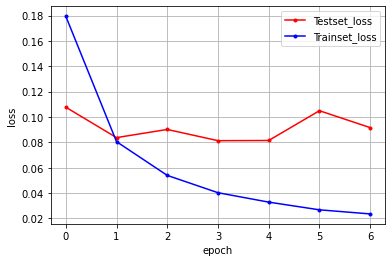

In [13]:
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right') # loc범례를 표시하는 속성 => lower right, right ...
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()